# Find root vertex of a graph
> Given a graph find a vertex `v` such that all other vertex is reachable from `v`

- toc: false
- badges: true
- comments: true
- categories: [graph, dfs]

In [ ]:
# collapse-output
# Optional
!pip install networkx
!pip install matplotlib

## Problem
Given a directed graph, find a root vertex of the graph. The root vertex $\mathcal{v}$ is defined as any vertex $\mathcal{v} \in \mathcal{G(V, E)}$ such that all other vertex in $\mathcal{G}$ can be reached.

For example in the graph below, the vertex `4` is a root vertex as all other vertex can be reached from `4`

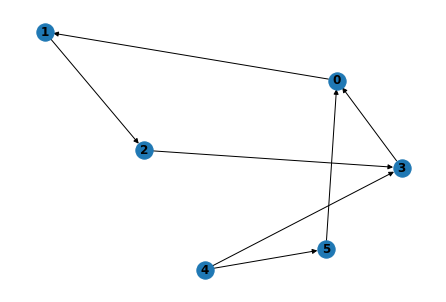

In [1]:
#collapse-hide
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

edges = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 3), (4, 5), (5, 0)]
G.add_edges_from(edges)
nx.draw(G, with_labels=True, font_weight='bold')

# total number of nodes in the graph
N = 6

## Solution

This can be solved by doing depth first search (DFS) on the graph and keeping track of the node with highest departure time. The vertex with highest departure time could be the root node if all other node can be reached by doing DFS starting that vertex

In [34]:
from typing import List
from typing import Tuple


class Graph:
    def __init__(self, num_vertices: int, edges: List[Tuple[int, int]]) -> None:
        self.num_vertices = num_vertices
        self.adj = [[] for i in range(self.num_vertices)]
        
        for edge in edges:
            self.add_edge(edge[0], edge[1])
    
    def add_edge(self, src: int, dest: int) -> None:
        self.adj[src].append(dest)        

In [35]:
def depth_first_search(g: Graph, start_vertex_id: int, visited:List[bool]):

    visited[start_vertex_id] = True

    for vertex in g.adj[start_vertex_id]:
        if not visited[vertex]:
            depth_first_search(g, vertex, visited)


In [36]:
def find_root_vertex(graph: Graph) -> int:
    
    visited = [False] * graph.num_vertices
    
    # last visited vertex in DFS has the highest departure time
    last_visited = -1
    
    for i in range(graph.num_vertices):
        if not visited[i]:
            last_visited = i
            depth_first_search(graph, i, visited)
    
    # Re-run DFS starting last_visited node as the root 
    # to verify if all vertex can be reached
    visited = [False] * graph.num_vertices
    depth_first_search(graph, last_visited, visited)
    
    # verifying if all nodes has been visited
    for i in range(graph.num_vertices):
        if not visited[i]:
            return -1
    
    # returning the root candidate
    return last_visited

In [37]:
# collapse-hide
# build a directed graph from the given edges
graph = Graph(N, edges)

# find the root vertex in the graph
root = find_root_vertex(graph)

if root != -1:
    print(f"The root vertex is {root}")
else:
    print("The root vertex does not exist")

The root vertex is 4
